<a href="https://colab.research.google.com/github/naoya1110/nitkc-ncku-ai-robotics/blob/main/Week03_sup_PyTorch_Simple_Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a supplemental material for Week03 to explain how the model parameters are updated with stochastic gradient decent (SGD).

In this example, we are going to implement a simple linear regression model with PyTorch.

First of all, let's import packages of PyTorch, Numpy and Matplotlib.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Here we create a dataset of $x$ (input) and $y$ (output) with a simple linear equation below. Note that output data $y$ contains some random noise. 

$y = 5x + 3 + \mathrm{noise}$

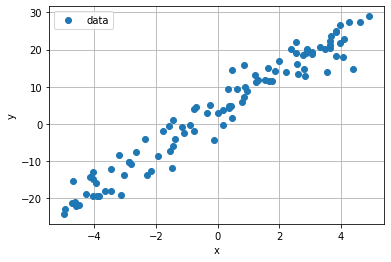

In [2]:
x = 10*np.random.rand(100)-5
noise = 3*np.random.randn(x.shape[0])
y = 5*x + 3 + noise
plt.plot(x, y, marker="o", lw= 0, label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Our goal is to find a linear function model (equation) that can fit the x-y dataset well.

Instead of using PyTorch, we can simply use `np.polyfit()` to fit the dataset. Then we can obtain the fitting parameters of $w$ and $b$ of a linear function of $y = wx + b$, where $w$ and $b$ are called weight and bias, respectively.

In [3]:
w, b = np.polyfit(x, y, 1)
print(f"w={w:.3f}, b={b:.3f}")

w=5.093, b=3.398


Because the x-y dataset contains some noise, obtained $w$ and $b$ are not exactly same as we used for creating the dataset, but they are close enough. Anyway we can make a fitting line with the obtained parameters of $w$ and $b$.

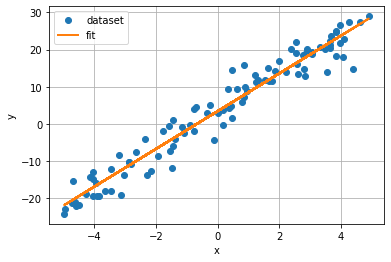

In [4]:
y_fit = w*x + b

plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, y_fit, lw=2, label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

So `np.polyfit()` works very well. But in this example we will do the same thing with PyTorch.

Now we convert the dataset of $x$ and $y$ into PyTorch Tensor.

In [5]:
x = torch.tensor(x)
y = torch.tensor(y)

print(type(x))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


Then we define a function named `model()` that predicts an output value of $y$ from an input value of $x$ with the parameters of $w$ and $b$.

In [6]:
def model(x):
    return w*x + b

Also we define a function named `loss_func()` to calculate the mean squared error between $p$ and $y$, where $p$ is the output values, i.e. prediction, of the `model()`. This kind of function is called loss function which can be used for measuring how wrong the model prediction was.

$\displaystyle \mathrm{loss} = \mathrm{mse}(p, y) = \frac{1}{N}\sum_{i=0}^{N-1}(p_i-y_i)^2$

In [7]:
def loss_func(p, y):
    return ((p-y)**2).mean()

At this point we don't know what $w$ and $b$ are. So we initialize those values with arbitary numbers.

In [8]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

Now we can make a prediction using `model()`

In [9]:
p = model(x)
print(p)

tensor([-4.6717, -3.3686, -4.5741, -1.1753, -8.9409, -2.0899, -4.1413, -2.4630,
        -1.9338, -4.1171, -5.7585, -6.4729, -5.8835, -2.1996, -4.8134, -5.2558,
        -4.5199, -2.3923, -1.0443, -4.0651, -8.4577, -1.4489, -1.1500, -8.1449,
        -4.6178, -9.1521, -8.8452, -5.7126, -8.9207, -9.0395, -0.9193, -9.9658,
        -3.4497, -6.4615, -0.3727, -4.1418, -9.9496, -2.1847, -5.1290, -6.1410,
        -0.9449, -1.6929, -9.2647, -1.3612, -8.4650, -1.1769, -4.6298, -6.5554,
        -6.7773, -1.3255, -6.4612, -6.1049, -3.7974, -7.8653, -1.5326, -7.6355,
        -2.7992, -4.3653, -2.2325, -2.9983, -2.1367, -9.6084, -7.8805, -6.9248,
        -4.8201, -0.1023, -3.7552, -3.2330, -7.2903, -8.0451, -9.0362, -3.3425,
        -7.8217, -6.5833, -2.4687, -1.3720, -9.5909, -5.7612, -2.4184, -4.9878,
        -9.4853, -5.3360, -7.1489, -8.2045, -1.9271, -6.3897, -3.7082, -0.6095,
        -3.1531, -4.5502, -0.7562, -7.3477, -4.2000, -1.0335, -9.6941, -8.6453,
        -9.0431, -1.3494, -2.6228, -9.71

Let's visualize current prediction. As we set arbitary number for $w$ and $b$, the model prediction does not fit the data well for sure.

Text(0, 0.5, 'y')

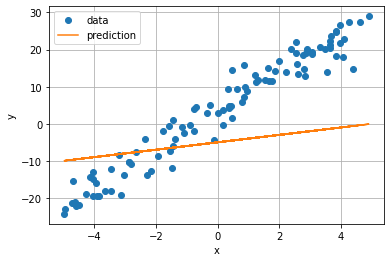

In [10]:
plt.plot(x, y, marker="o", lw=0, label="data")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Then we calculate loss (mean squared error) value by using `loss_func()`. Note that the loss value is very large because $w$ and $b$ are arbitaly values and not optimized yet.

In [11]:
loss = loss_func(p, y)
print(loss)

tensor(225.0396, dtype=torch.float64, grad_fn=<MeanBackward0>)


In order to optimize $w$ amd $b$, we need to know the gradients of loss respect to current $w$ and $b$ respectively. This can be done with `loss.backward()`. The gradients of $ \frac{\partial \mathrm{loss}}{\partial w}$ and $\frac{\partial \mathrm{loss}}{\partial b}$ can be accessed by `w.grad` and `b.grad`, respectively.

In [12]:
loss.backward()
print(w.grad)
print(b.grad)

tensor(-68.8243)
tensor(-17.2722)


Then we can update $w$ and $b$ by using equations below where $\eta$ is learning rate. This is a method called stochastic gradient descent (SGD).

$\displaystyle w := w - \eta\frac{\partial \mathrm{loss}}{\partial w}$

$\displaystyle b := b - \eta\frac{\partial \mathrm{loss}}{\partial b}$


When we update those values we don't want to calculate the gradients. For this purpose `with torch.no_grad()` is stated at the beginning.

In [13]:
lr = 0.01    # define learning rate

with torch.no_grad():    # disable gradients calculations
    w -= w.grad*lr       # update w
    b -= b.grad*lr       # update b

At this point you can find the values of $w$ and $b$ are a bit closer to the true values ($w$=5.0, $b$=3.0) than the initial values.

In [14]:
print(w)
print(b)

tensor(1.6882, requires_grad=True)
tensor(-4.8273, requires_grad=True)


In order to optimize $w$ and $b$ further, we repeat above process many times.

In [15]:
w = torch.tensor(1.0, requires_grad=True)   # you can set any number here
b = torch.tensor(-5.0, requires_grad=True)  # you can set any number here

lr = 0.01    # learning rate 
epochs = 50  # how many times we repeat training

w = torch.tensor(3.0, requires_grad=True)    # initialize w
b = torch.tensor(-1.0, requires_grad=True)   # initialize b

# empty lists for saving loss, w, b
loss_list = []
w_list = []
b_list = []

for epoch in range(epochs):

    p = model(x)              # prediction
    loss = loss_func(p, y)    # measure loss
    loss.backward()           # determine gradients

    with torch.no_grad():     # disable autograd
        w -= w.grad*lr        # update w 
        b -= b.grad*lr        # update b
        
        w.grad.zero_() # reset gradient
        b.grad.zero_() # reset gradient

    # save loss, w, b
    loss_list.append(loss.item())
    w_list.append(w.item())
    b_list.append(b.item())

    print(f"Epoch {epoch+1}, loss={loss.item():.3f}, w={w.item():.3f}, b={b.item():.3f}")

Epoch 1, loss=68.386, w=3.352, b=-0.910
Epoch 2, loss=56.212, w=3.646, b=-0.821
Epoch 3, loss=47.540, w=3.891, b=-0.735
Epoch 4, loss=41.311, w=4.095, b=-0.651
Epoch 5, loss=36.791, w=4.265, b=-0.569
Epoch 6, loss=33.467, w=4.407, b=-0.489
Epoch 7, loss=30.983, w=4.525, b=-0.410
Epoch 8, loss=29.091, w=4.624, b=-0.334
Epoch 9, loss=27.616, w=4.706, b=-0.258
Epoch 10, loss=26.438, w=4.774, b=-0.185
Epoch 11, loss=25.473, w=4.831, b=-0.113
Epoch 12, loss=24.662, w=4.879, b=-0.042
Epoch 13, loss=23.963, w=4.918, b=0.027
Epoch 14, loss=23.348, w=4.951, b=0.094
Epoch 15, loss=22.796, w=4.979, b=0.161
Epoch 16, loss=22.294, w=5.001, b=0.226
Epoch 17, loss=21.830, w=5.020, b=0.289
Epoch 18, loss=21.397, w=5.036, b=0.351
Epoch 19, loss=20.991, w=5.049, b=0.412
Epoch 20, loss=20.607, w=5.060, b=0.472
Epoch 21, loss=20.243, w=5.069, b=0.531
Epoch 22, loss=19.897, w=5.076, b=0.588
Epoch 23, loss=19.566, w=5.082, b=0.644
Epoch 24, loss=19.250, w=5.087, b=0.699
Epoch 25, loss=18.947, w=5.091, b=0.7

Now you see $w$ is close to 5.0 and $b$ is close to 3.0.

Let's visualize how the loss value decreased.

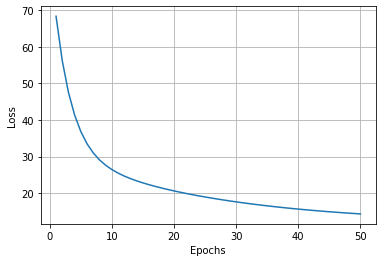

In [16]:
plt.plot(np.arange(epochs)+1, loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

Let's visualize how the `w` value updated with epochs.

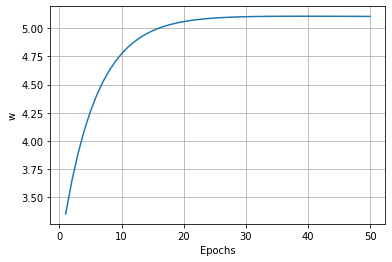

In [17]:
plt.plot(np.arange(epochs)+1, w_list)
plt.xlabel("Epochs")
plt.ylabel("w")
plt.grid()

Let's visualize how the `b` value updated with epochs.

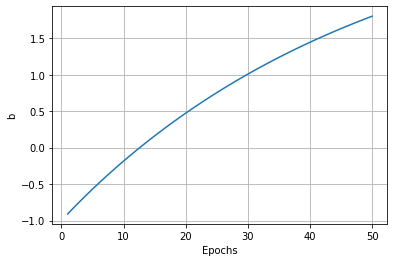

In [18]:
plt.plot(np.arange(epochs)+1, b_list)
plt.xlabel("Epochs")
plt.ylabel("b")
plt.grid()

Text(0, 0.5, 'y')

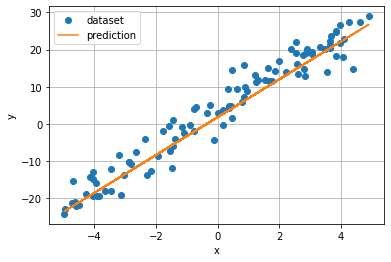

In [19]:
plt.plot(x, y, marker="o", lw=0, label="dataset")
plt.plot(x, p.detach().numpy(), label="prediction")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Now you can try to change initial values of `epochs`, `lr`, `w`, `b` etc. and see what happens.